In [1]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [17]:
import tensorflow as tf
import os

In [18]:
import cv2
import imghdr
import random
import numpy as np 
from matplotlib import pyplot as plt

In [19]:
Datadir = 'B:/Data/myimg'
datax = tf.keras.utils.image_dataset_from_directory(Datadir)

Found 2000 files belonging to 4 classes.


In [20]:
data_iterator = datax.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
batch

(array([[[[  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          ...,
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ]],
 
         [[  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          ...,
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ]],
 
         [[  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          ...,
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ],
          [  0.      ,   0.      ,   0.      ]],
 
         ...,
 
         [[161.30035 , 161.30035 , 161.30035 ],
          [228.116

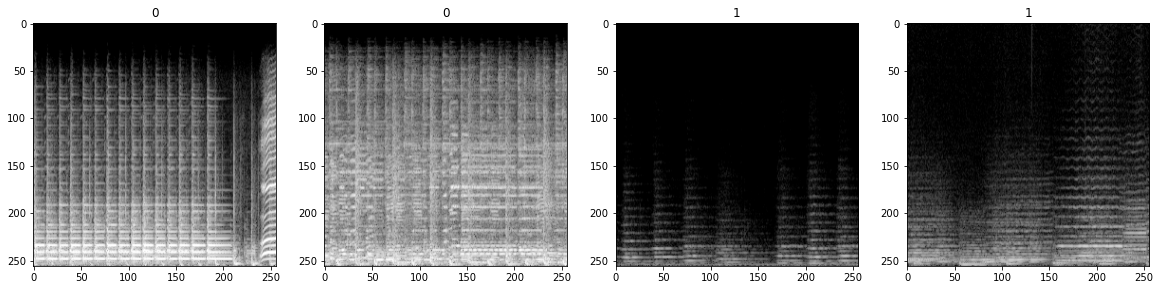

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
batch[0].max()

255.0

In [25]:
datax = datax.map(lambda x,y: (x/255, y))

In [26]:
datax.as_numpy_iterator().next()[0].max()

1.0

In [27]:
batch = datax.as_numpy_iterator().next()

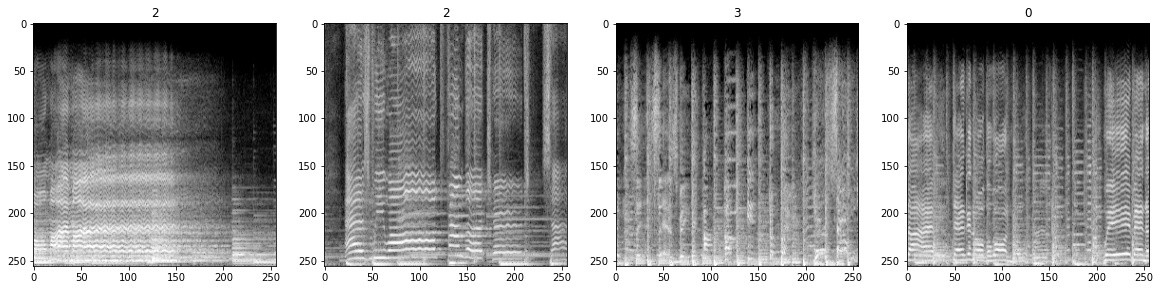

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [29]:
len(batch[0])

32

In [30]:
len(datax)

63

In [31]:
train_size = int(len(datax)*.7)
val_size = int(len(datax)*.2)
test_size = int(len(datax)*.1)

In [32]:
train_size + val_size + test_size

62

In [33]:
train = datax.take(train_size)
val = datax.skip(train_size).take(val_size)
test = datax.skip(train_size+val_size).take(test_size)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [45]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy (from_logits=False, name='sparse_categorical_crossentropy'), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 8)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 16)      1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)      

In [47]:
logdir='logs'

In [48]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
44/44 [==============================] - 27s 584ms/step - loss: 1.2753 - accuracy: 0.4240 - val_loss: 1.0309 - val_accuracy: 0.5547
Epoch 2/10
44/44 [==============================] - 25s 561ms/step - loss: 0.8658 - accuracy: 0.6129 - val_loss: 0.7031 - val_accuracy: 0.7161
Epoch 3/10
44/44 [==============================] - 25s 558ms/step - loss: 0.6447 - accuracy: 0.7393 - val_loss: 0.5334 - val_accuracy: 0.7786
Epoch 4/10
44/44 [==============================] - 25s 555ms/step - loss: 0.4795 - accuracy: 0.8104 - val_loss: 0.4720 - val_accuracy: 0.8073
Epoch 5/10
44/44 [==============================] - 25s 555ms/step - loss: 0.3722 - accuracy: 0.8587 - val_loss: 0.3930 - val_accuracy: 0.8385
Epoch 6/10
44/44 [==============================] - 26s 581ms/step - loss: 0.2486 - accuracy: 0.9077 - val_loss: 0.4624 - val_accuracy: 0.8177
Epoch 7/10
44/44 [==============================] - 25s 557ms/step - loss: 0.1595 - accuracy: 0.9503 - val_loss: 0.4808 - val_accuracy: 0.8411

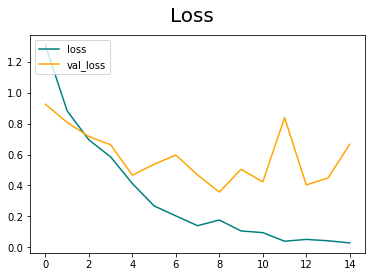

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

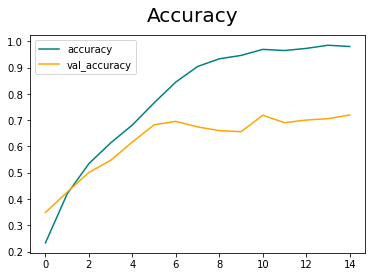

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
from tensorflow.keras.metrics import Precision, Recall

In [33]:
import cv2
import numpy as np


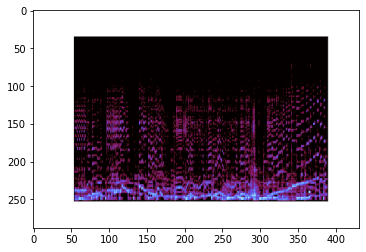

In [34]:
img = cv2.imread('B:/images_original/jazz/jazz00008.png')
plt.imshow(img)
plt.show()

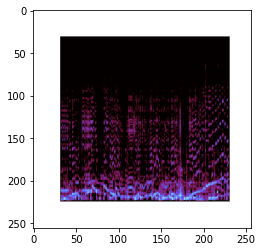

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 229ms/step


In [37]:
yhat

array([[1.0000000e+00, 8.3422441e-26, 5.6980891e-16, 3.3830752e-21,
        3.6026288e-19, 6.2549492e-17, 3.4743331e-24, 5.7590766e-32,
        6.9522445e-14, 1.2481943e-13]], dtype=float32)

In [38]:
yhat = yhat.argmax()

In [39]:
yhat

0

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save_weights("B:/music.hdf5", overwrite=True)
